In [1]:
# this notebook is for plotting
# the end to end analysis
import numpy as np
import matplotlib.pyplot as plt
#load mdtraj
import mdtraj as md
import os

In [15]:
traj = md.load ("Inputs/ala300.trr", top='Inputs/ala300.gro')

In [48]:
psi = md.compute_psi (traj)
phi = md.compute_phi (traj)

In [49]:
print(psi)
print(phi)

(array([[ 6,  8, 14, 16]]), array([[2.791988 ],
       [2.8352711],
       [2.6805816],
       ...,
       [1.7104684],
       [1.4489204],
       [1.2237804]], dtype=float32))
(array([[ 4,  6,  8, 14]]), array([[-2.8562374],
       [-2.849377 ],
       [-2.462237 ],
       ...,
       [-1.2727029],
       [-1.4382396],
       [-1.456448 ]], dtype=float32))


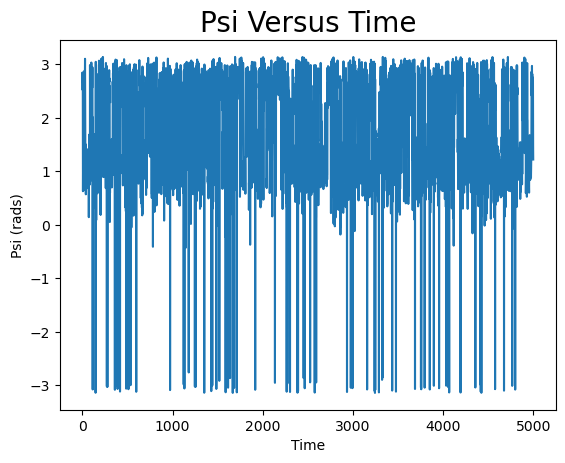

In [56]:
# plot psi
plt.xlabel('Time')
plt.ylabel('Psi (rads)')
plt.title('Psi Versus Time', fontsize=20)
plt.plot(psi[1])

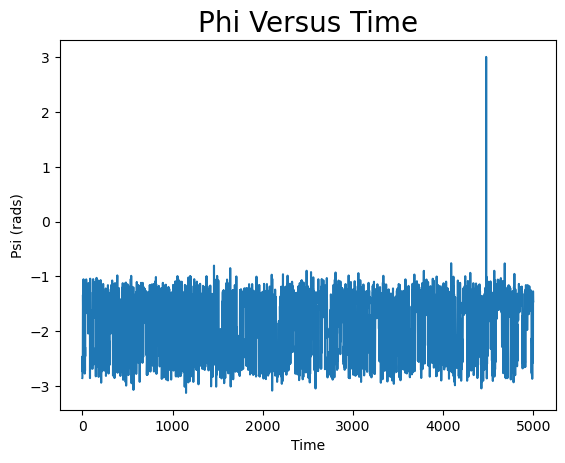

In [55]:
# plot phi
plt.xlabel('Time')
plt.ylabel('Psi (rads)')
plt.title('Phi Versus Time', fontsize=20)
plt.plot(phi[1])

(array([[ 1.,  0.,  0., ...,  0.,  4.,  0.],
        [ 1.,  0.,  0., ...,  5.,  7.,  6.],
        [10.,  1.,  0., ..., 32., 21., 19.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([-3.12828016, -3.00555617, -2.88283217, -2.76010818, -2.63738419,
        -2.51466019, -2.3919362 , -2.2692122 , -2.14648821, -2.02376421,
        -1.90104022, -1.77831623, -1.65559223, -1.53286824, -1.41014424,
        -1.28742025, -1.16469625, -1.04197226, -0.91924827, -0.79652427,
        -0.67380028, -0.55107628, -0.42835229, -0.30562829, -0.1829043 ,
        -0.06018031,  0.06254369,  0.18526768,  0.30799168,  0.43071567,
         0.55343966,  0.67616366,  0.79888765,  0.92161165,  1.04433564,
         1.16705964,  1.28978363,  1.41250762,  1.53523162,  1.65795561,
         1.78067961,  1.9034036 ,  2.0261276 ,  2.14885159,  2.27157558,
         2.39429958,  2.51702357,  2.63974757,  2.76247156

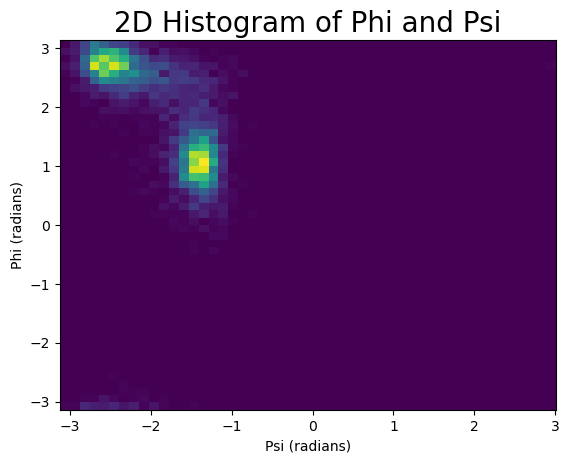

In [64]:
plt.xlabel('Psi (radians)')
plt.ylabel('Phi (radians)')
plt.title('2D Histogram of Phi and Psi', fontsize=20)
plt.hist2d(phi[1][:,0],psi[1][:,0], bins=50)

/state/partition1/job-25646102/ipykernel_133962/2788996103.py:2: RuntimeWarning: divide by zero encountered in log
  plt.imshow(-np.log(H.T), extent = [xedges[0], xedges [-1], yedges[0], yedges [-1]], aspect='auto')


Text(0, 0.5, 'Psi(rads)')

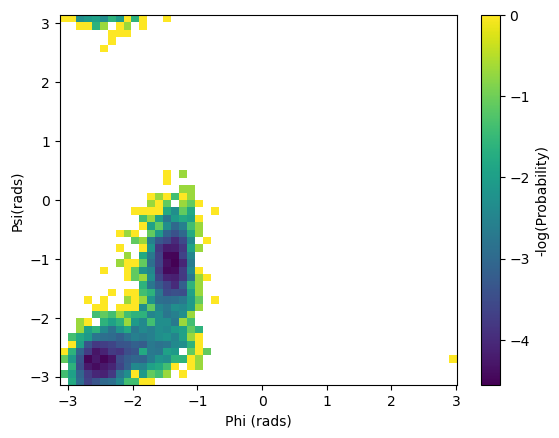

In [71]:
H, xedges, yedges = np.histogram2d(phi[1][:,0],psi[1][:,0], bins=50)
plt.imshow(-np.log(H.T), extent = [xedges[0], xedges [-1], yedges[0], yedges [-1]], aspect='auto')
plt.colorbar(label='-log(Probability)')
plt.xlabel('Phi (rads)')
plt.ylabel('Psi(rads)')

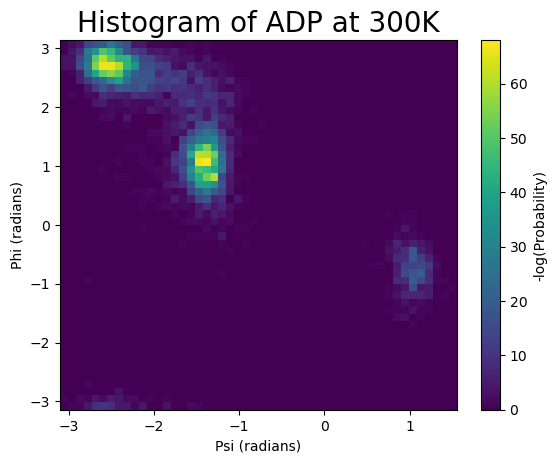

In [3]:
# part 2 
# load the trajectory
traj2 = md.load("/home/ess545/comp-lab-class/Week5/Inputs/T300/adp_exchange4temps.trr", top='/home/ess545/comp-lab-class/Week5/Inputs/T300/adp_exchange4temps.gro')

psi2 = md.compute_psi (traj2)
phi2 = md.compute_phi (traj2)
plt.xlabel('Psi (radians)')
plt.ylabel('Phi (radians)')
plt.title('Histogram of ADP at 300K', fontsize=20)
plt.hist2d(phi2[1][:,0],psi2[1][:,0], bins=50)
plt.colorbar(label='-log(Probability)')


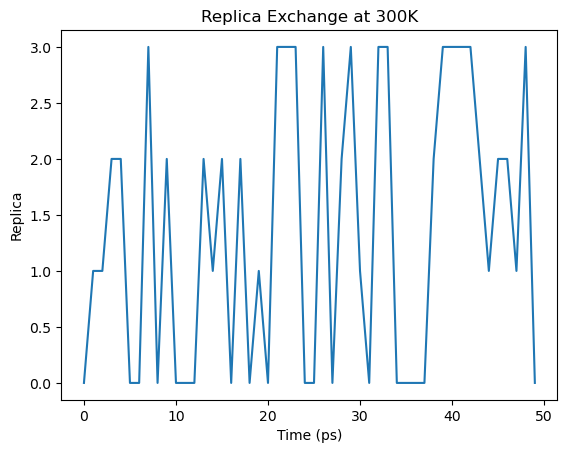

In [5]:
# plot how each replica is moving in temperature
# load xvg files from T300 directory 
time_300 = np.loadtxt('/home/ess545/comp-lab-class/Week5/Inputs/T300/replica_index.xvg')
plt.plot(time_300[::1000,1], label='Replica')
plt.xlabel('Time (ps)')
plt.ylabel('Replica')
plt.title('Replica Exchange at 300K')
# use arial font and make bigger
plt.savefig("ReplicaExchange.png", format="png", bbox_inches="tight")

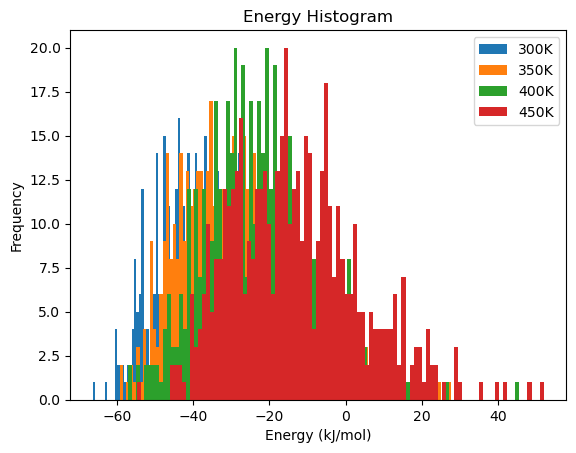

In [7]:
os.chdir("/home/ess545/comp-lab-class/Week5/")
#plot energy at temperatures
energy3 = np.loadtxt('Inputs/T300/T300-energy.xvg',comments=["@","#"],unpack=True)
energy35 = np.loadtxt('Inputs/T350/T350-energy.xvg',comments=["@","#"],unpack=True)
energy4 = np.loadtxt('Inputs/T400/T400-energy.xvg',comments=["@","#"],unpack=True)
energy45 = np.loadtxt('Inputs/T450/T450-energy.xvg',comments=["@","#"],unpack=True)
plt.hist(energy3[1], bins=100, label='300K')
plt.hist(energy35[1], bins=100, label='350K')
plt.hist(energy4[1], bins=100, label='400K')
plt.hist(energy45[1], bins=100, label='450K')
# add title
plt.title('Energy Histogram')
plt.xlabel('Energy (kJ/mol)')
plt.ylabel('Frequency')
plt.legend()
plt.savefig("Energy-Hist.png", format="png")